# Task - 1

Aim - Predict the percentage 0f marks of an student based on the number of study hours

# Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

Simple Linear Regression





In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data

In [59]:
score = pd.read_csv('data.csv')

In [60]:
score.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [61]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [62]:
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [63]:
score.isna().sum()

Hours     0
Scores    0
dtype: int64

In [64]:
score.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Data Visualization

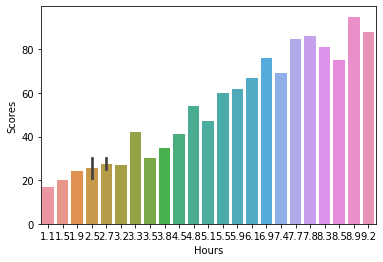

In [65]:
ax = sns.barplot(x="Hours", y="Scores", data = score)

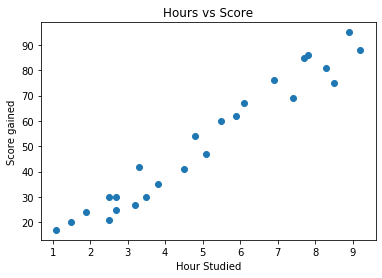

In [66]:
from matplotlib import style
plt.scatter(score['Hours'],score['Scores'])
plt.title("Hours vs Score")
plt.xlabel("Hour Studied")
plt.ylabel("Score gained")
plt.show()

In [67]:
x = score.iloc[:,:-1].values
y = score.iloc[:,1].values

#### Data splitting for training and testing

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,  y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#### Training a model

In [69]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print('Training complete')

Training complete


<function matplotlib.pyplot.show(*args, **kw)>

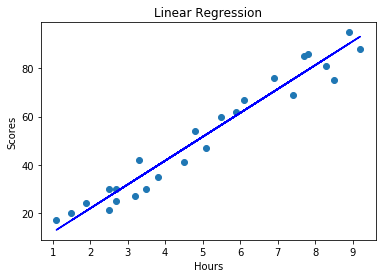

In [70]:
line = reg.coef_*x+reg.intercept_

plt.title('Linear Regression')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(x,y)
plt.plot(x,line, color ="blue")
plt.show

In [71]:
y_pred = reg.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [72]:
df  = pd.DataFrame({'Actual': y_test , 'Prediction' : y_pred})
df

,Actual,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


##### Task complete

In [73]:
hours = [9.25]
scores = reg.predict([hours])
dff = pd.DataFrame({'Hours':hours, 'Scores': scores})
dff

,Hours,Scores
0,9.25,93.691732


# The percentage of marks score by student for 9.25 hours is 93.69%

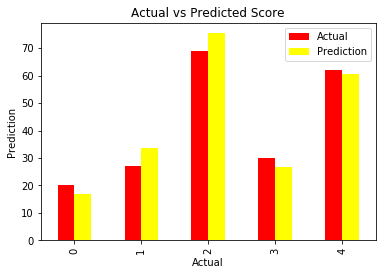

In [74]:
df.plot(kind ='bar',color=['red','yellow'])
plt.title("Actual vs Predicted Score")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.legend(["Actual","Prediction"])
plt.show()

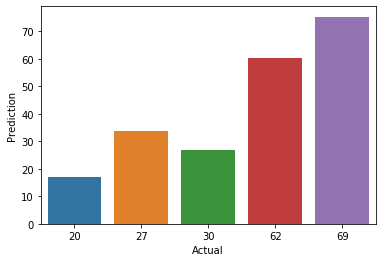

In [75]:
ax = sns.barplot(x="Actual", y="Prediction", data = df)

#### Evalute the model performance

In [76]:
from sklearn import metrics
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error: 4.183859899002975
